In [10]:
import pandas as pd
%matplotlib inline
import numpy as np

In [28]:
filename = 'tr_eikon_eod_data.csv'
data = pd.read_csv(filename, index_col=0, parse_dates=True)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1259 entries, 2014-04-16 to 2019-04-16
Data columns (total 4 columns):
IBM      1259 non-null float64
APPL     1259 non-null float64
AMZN     1259 non-null float64
Close    1259 non-null float64
dtypes: float64(4)
memory usage: 49.2 KB


In [4]:
data.head()

,IBM,APPL,AMZN,Close
Date,,,,
2014-04-16,196.399994,74.144287,323.679993,186.130005
2014-04-17,190.009995,74.991432,324.910004,186.389999
2014-04-21,192.270004,75.881432,330.869995,187.039993
2014-04-22,192.149994,75.957146,329.320007,187.889999
2014-04-23,191.729996,74.964287,324.579987,187.449997


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f15f872b9b0>,
      dtype=object)

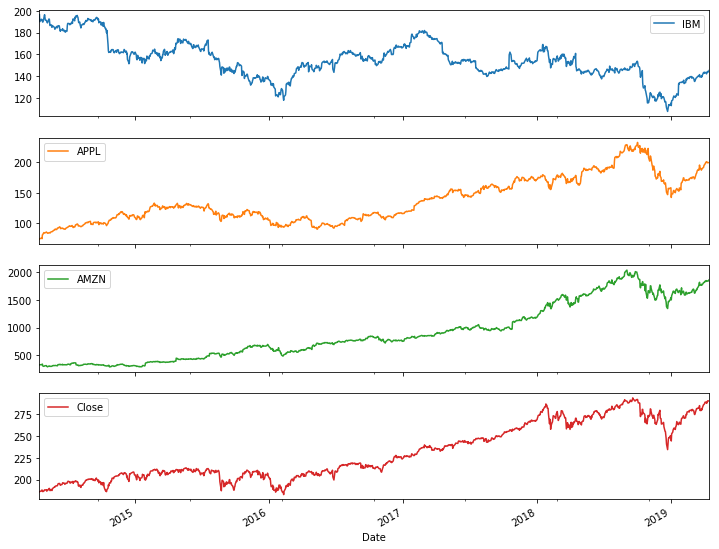

In [7]:
data.plot(figsize=(12, 10), subplots=True)

In [8]:
data.describe().round(2)

,IBM,APPL,AMZN,Close
count,1259.00,1259.00,1259.00,1259.00
mean,155.03,136.89,899.92,230.74
std,17.24,36.25,503.59,31.40
min,107.57,74.14,286.95,182.86
25%,144.65,108.40,465.97,205.47
50%,153.68,126.44,769.16,217.38
75%,163.29,166.80,1293.95,262.66
max,196.47,232.07,2039.51,293.58


In [11]:
data.aggregate([min, np.mean, np.std, np.median, max]).round(2)

,IBM,APPL,AMZN,Close
min,107.57,74.14,286.95,182.86
mean,155.03,136.89,899.92,230.74
std,17.24,36.25,503.59,31.40
median,153.68,126.44,769.16,217.38
max,196.47,232.07,2039.51,293.58


In [13]:
data.diff().head()

,IBM,APPL,AMZN,Close
Date,,,,
2014-04-16,NaN,NaN,NaN,NaN
2014-04-17,-6.389999,0.847145,1.230011,0.259994
2014-04-21,2.260009,0.890000,5.959991,0.649994
2014-04-22,-0.120010,0.075714,-1.549988,0.850006
2014-04-23,-0.419998,-0.992859,-4.740020,-0.440002


In [14]:
data.diff().mean()

IBM     -0.040747
APPL     0.099448
AMZN     1.223657
Close    0.082695
dtype: float64

In [16]:
data.pct_change().round(2).head()

,IBM,APPL,AMZN,Close
Date,,,,
2014-04-16,NaN,NaN,NaN,NaN
2014-04-17,-0.03,0.01,0.00,0.0
2014-04-21,0.01,0.01,0.02,0.0
2014-04-22,-0.00,0.00,-0.00,0.0
2014-04-23,-0.00,-0.01,-0.01,-0.0


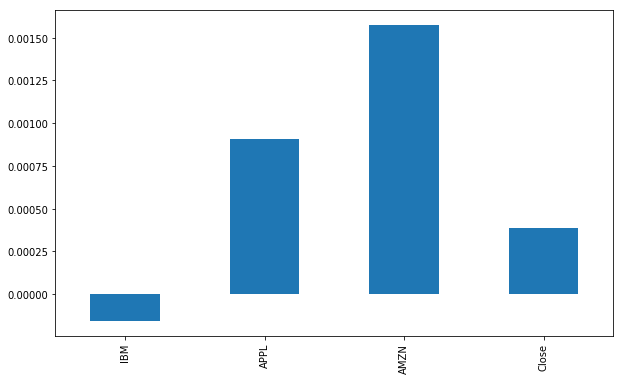

In [17]:
data.pct_change().mean().plot(kind='bar', figsize=(10,6))

In [18]:
rets = np.log(data/data.shift(1))

In [19]:
rets.head().round(2)

,IBM,APPL,AMZN,Close
Date,,,,
2014-04-16,NaN,NaN,NaN,NaN
2014-04-17,-0.03,0.01,0.00,0.0
2014-04-21,0.01,0.01,0.02,0.0
2014-04-22,-0.00,0.00,-0.00,0.0
2014-04-23,-0.00,-0.01,-0.01,-0.0


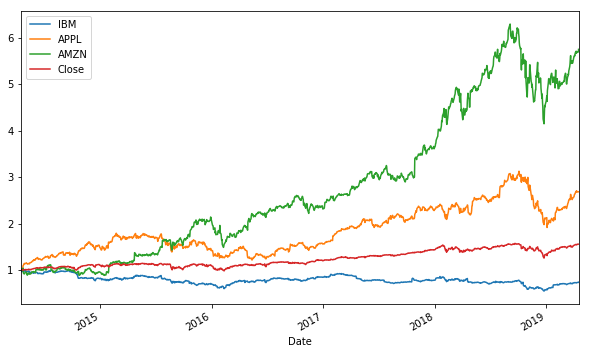

In [20]:
rets.cumsum().apply(np.exp).plot(figsize=(10, 6))

In [21]:
data.resample('1w', label='right').last().head()

,IBM,APPL,AMZN,Close
Date,,,,
2014-04-20,190.009995,74.991432,324.910004,186.389999
2014-04-27,189.630005,81.705711,303.829987,186.289993
2014-05-04,191.440002,84.654289,308.010010,188.059998
2014-05-11,190.080002,83.648575,292.239990,187.960007
2014-05-18,187.059998,85.358574,297.700012,188.050003


In [22]:
data.resample('1m', label='right').last().head()

,IBM,APPL,AMZN,Close
Date,,,,
2014-04-30,196.470001,84.298569,304.130005,188.309998
2014-05-31,184.360001,90.428574,312.549988,192.679993
2014-06-30,181.270004,92.930000,324.779999,195.720001
2014-07-31,191.669998,95.599998,312.989990,193.089996
2014-08-31,192.300003,102.500000,339.040009,200.710007


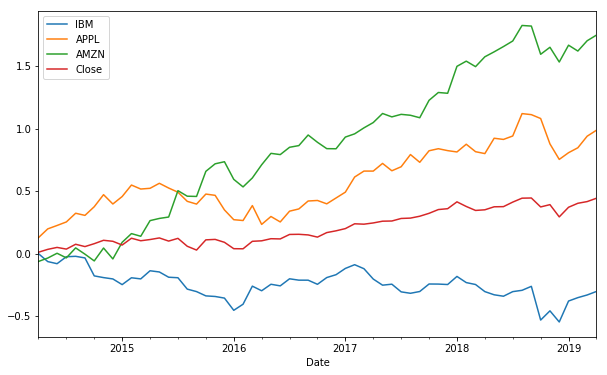

In [24]:
rets.cumsum().resample('1m', label='right').last().plot(figsize=(10, 6))

In [29]:
sym = 'APPL'
data1 = pd.DataFrame(data[sym])

In [30]:
data1.tail()

,APPL
Date,
2019-04-10,200.619995
2019-04-11,198.949997
2019-04-12,198.869995
2019-04-15,199.229996
2019-04-16,199.250000


In [31]:
window = 20
data1['min'] = data1[sym].rolling(window=window).min()

In [32]:
data1[25:30]

,APPL,min
Date,,
2014-05-22,86.752853,81.705711
2014-05-23,87.732857,83.648575
2014-05-27,89.375717,83.648575
2014-05-28,89.144287,83.648575
2014-05-29,90.768570,83.648575


In [33]:
data1['mean'] = data1[sym].rolling(window=window).mean()
data1['std'] = data1[sym].rolling(window=window).std()
data1['median'] = data1[sym].rolling(window=window).median()
data1['max'] = data1[sym].rolling(window=window).max()

In [34]:
data1['ewma'] = data1[sym].ewm(halflife=0.5, min_periods=window).mean()

In [35]:
data1.dropna().head()

,APPL,min,mean,std,median,max,ewma
Date,,,,,,,
2014-05-14,84.838570,74.144287,81.953858,4.160888,84.397858,85.851425,84.812150
2014-05-15,84.117142,74.964287,82.452501,3.753345,84.397858,85.851425,84.290894
2014-05-16,85.358574,74.964287,82.970858,3.364428,84.557858,85.851425,85.091654
2014-05-19,86.370003,74.964287,83.495287,2.998788,84.618568,86.370003,86.050416
2014-05-20,86.387146,74.964287,84.016787,2.481107,84.636429,86.387146,86.302963


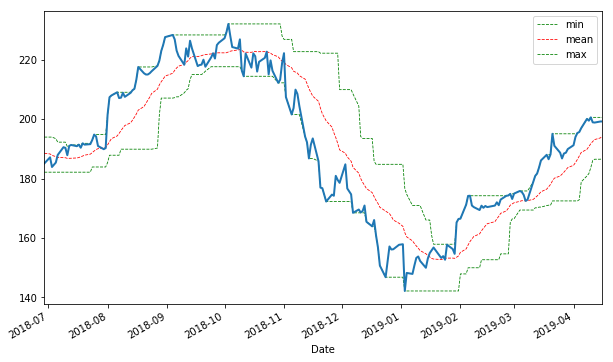

In [36]:
ax = data1[['min', 'mean', 'max']].iloc[-200:].plot(figsize=(10, 6), style=['g--', 'r--', 'g--'], lw=0.8)
data1[sym].iloc[-200:].plot(ax=ax, lw=2.0)

In [38]:
data1['SMA1'] = data1[sym].rolling(window=40).mean()
data1['SMA2'] = data1[sym].rolling(window=252).mean()
data1[[sym, 'SMA1', 'SMA2']].tail()

,APPL,SMA1,SMA2
Date,,,
2019-04-10,200.619995,182.94150,189.208691
2019-04-11,198.949997,183.66075,189.313889
2019-04-12,198.869995,184.36250,189.412024
2019-04-15,199.229996,185.08275,189.509246
2019-04-16,199.250000,185.79075,189.602223


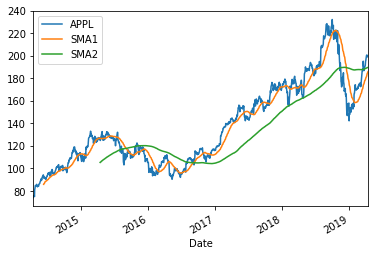

In [39]:
data1[[sym, 'SMA1', 'SMA2']].plot()

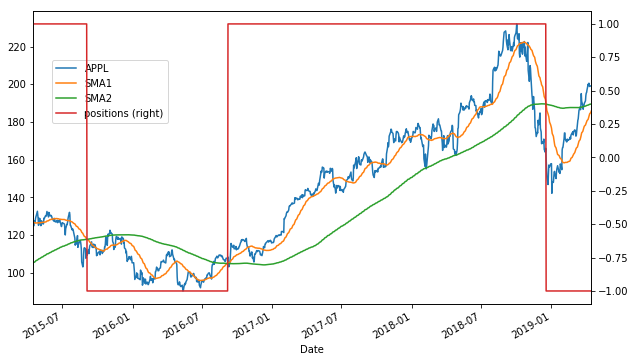

In [42]:
data1.dropna(inplace=True)
data1['positions'] = np.where(data1['SMA1']>data1['SMA2'], 1, -1)
ax = data1[[sym, 'SMA1', 'SMA2', 'positions']].plot(figsize=(10,6),secondary_y='positions')
ax.get_legend().set_bbox_to_anchor((0.25, 0.85))